In [1]:
import holiday #starteから共有不可
import sys,os
import dill

In [10]:
sys.path.append(os.path.join(os.path.dirname("__file__"), '../common/'))
INDATA_PATH = '../input/'
COMMON_PATH = '../common/'
PREPRO_PATH = '../prepro/'
from  plot_tool import Ax
from  plot_tool import Fig
from  common import common as com

In [3]:
dill.load_session(PREPRO_PATH+'starter.pkl')

### 特定項目

In [6]:
dt.now()

datetime.datetime(2020, 3, 14, 23, 8, 56, 735031)

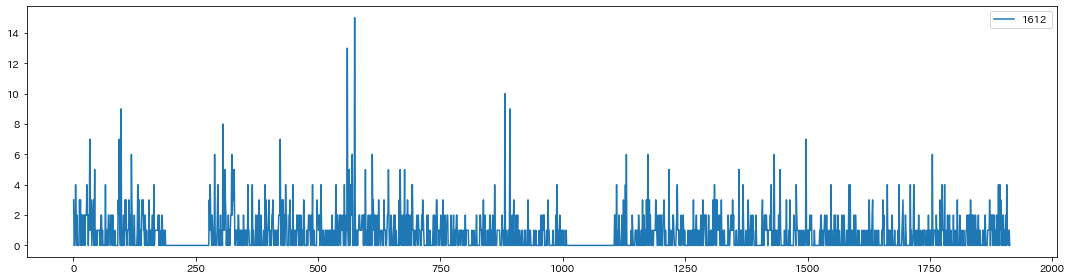

In [11]:

df_filtered = copy.copy(df_validation)
df_filtered = df_validation[df_validation.cat_id == 'FOODS']
fg = Fig(figsize=(15,4))
ax = fg.fig.add_subplot(1, 1, 1)
ax = Ax(fig=fg,ax=ax)
for _id in df_filtered.index[:1]:#.tolist():
    y = df_filtered.loc[_id,ls_col_d]
    x = ls_col_d_int
    ax.plot_line(x,y,_id)
ax.legend()

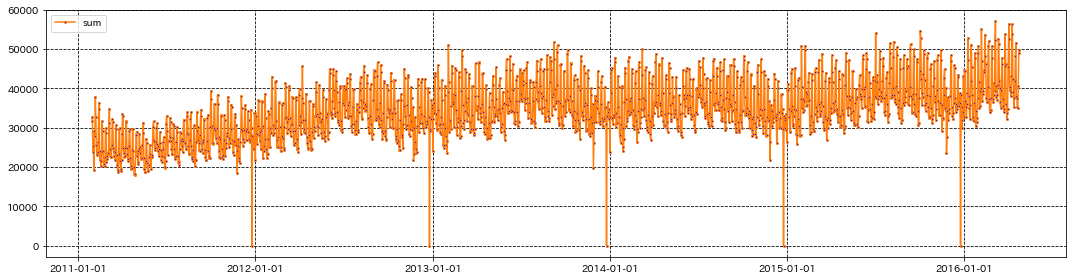

In [24]:

fg = Fig(figsize=(15,4))


ax = fg.fig.add_subplot(1, 1, 1)
ax = Ax(fig=fg,ax=ax)
df_filtered = copy.copy(df_validation)
df_filtered = df_filtered[ls_col_d].sum()

df_filtered = pd.DataFrame(df_filtered)
df_filtered = df_filtered.reset_index()
df_filtered = df_filtered.replace({'index':dct_d_to_date})
df_filtered = df_filtered.set_index('index')

#     df_filtered = df_filtered.resample(rule = 'M').sum()

ax.plot_line(
    df_filtered.index,
    df_filtered[0],
    'sum',
    color=ax.tab10(1),
    marker = 'o',
    markerfacecolor = 'b',
    markersize = 2
)

ax.xticklabelsDateFormatter('%Y-%m-%d')

ax.grid('x',True,color='black',linestyle='--')
ax.grid('y',True,color='black',linestyle='--')
ax.legend(loc='best')

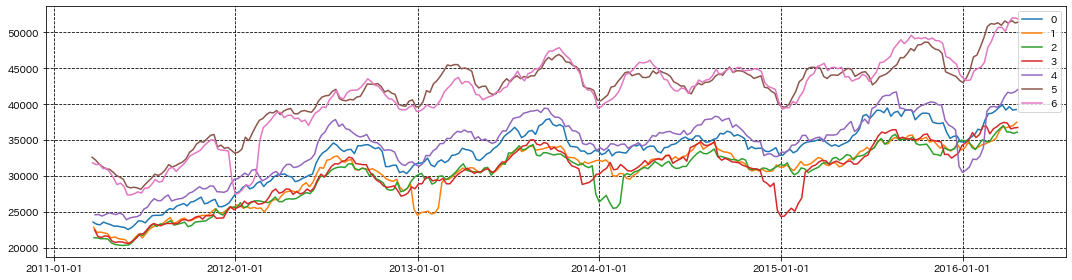

In [25]:

fg = Fig(figsize=(15,4))
ax = fg.fig.add_subplot(1, 1, 1)
ax = Ax(fig=fg,ax=ax)
for _wday in ls_weekday:

    df_filtered = copy.copy(df_validation)
    df_filtered = df_filtered[dct_ls_col_d_in_weekday[_wday]].sum()
    
    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_date})
    df_filtered = df_filtered.set_index('index')
    
#     df_filtered = df_filtered.resample(rule = 'M').sum()

    ax.plot_line(
        df_filtered.index,
        df_filtered[0].rolling(8).mean(),
        _wday,color=ax.tab10(ls_weekday.index(_wday))
    )
    
    ax.xticklabelsDateFormatter('%Y-%m-%d')
    
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(loc='upper right')


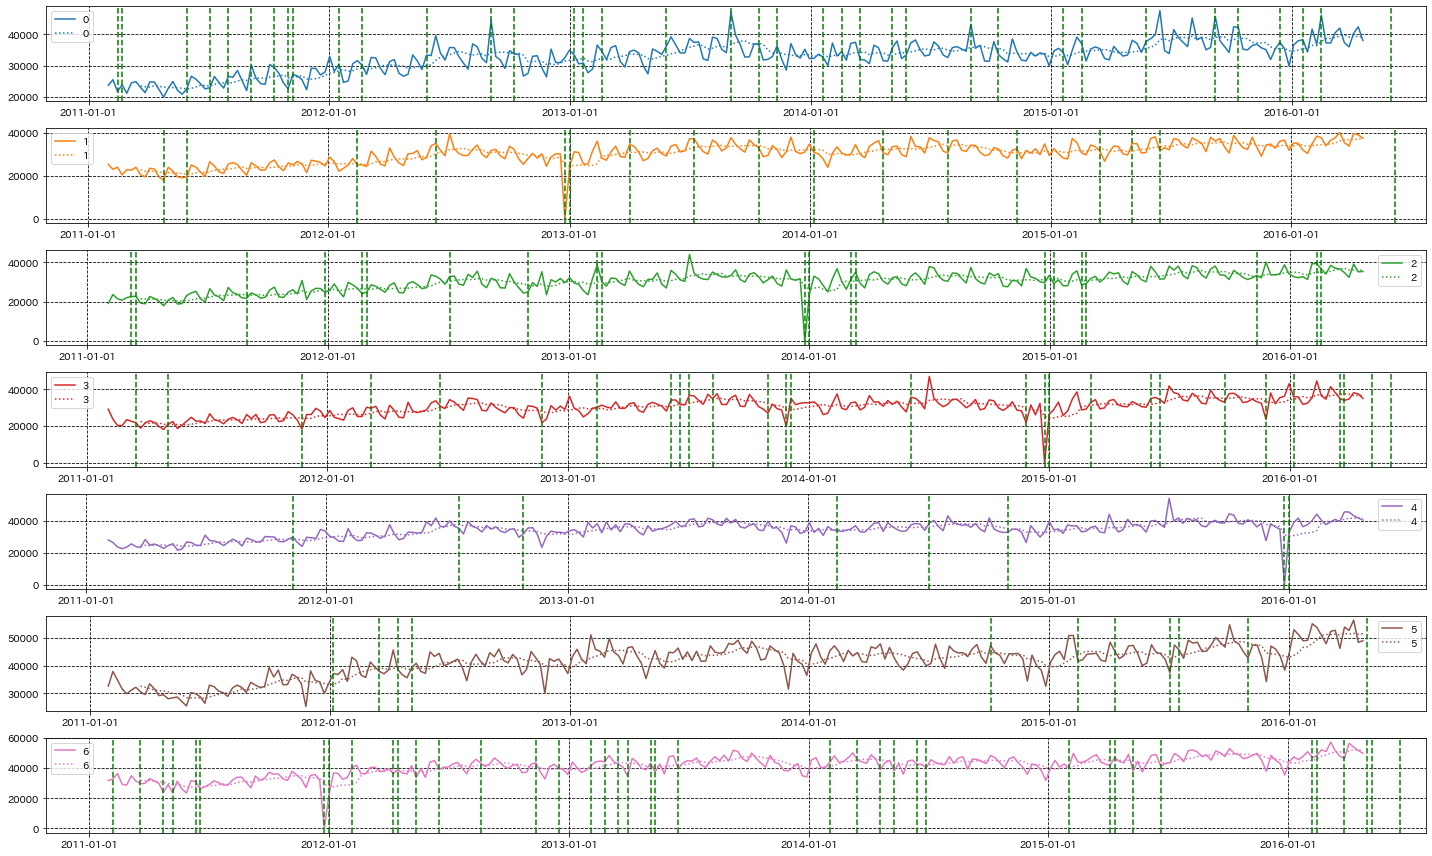

In [26]:

fg = Fig(figsize=(20,12))

for _wday in ls_weekday:
    ax = fg.fig.add_subplot(len(ls_weekday), 1, ls_weekday.index(_wday)+1)
    ax = Ax(fig=fg,ax=ax)
    df_filtered = copy.copy(df_validation)
    df_filtered = df_filtered[dct_ls_col_d_in_weekday[_wday]].sum()
    
    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_date})
    df_filtered = df_filtered.set_index('index')
    
#     df_filtered = df_filtered.resample(rule = 'M').sum()
    _c = ax.tab10(ls_weekday.index(ls_weekday.index(_wday)))
    ax.plot_line(
        df_filtered.index,
        df_filtered[0],
        _wday,
        color=_c,
        markerfacecolor = _c
    )
    
    ax.plot_line(
        df_filtered.index,
        df_filtered[0].rolling(8).mean(),
        _wday,
        color=_c,
        linestyle=':',
        markerfacecolor = _c
    )
    

    for _dt in dct_dt_to_spName.keys():
        if _dt.weekday() == _wday:
            ax.ax.axvline(x=_dt, ls='--',color = 'g')
#         print(_dt)
        
    
    ax.xticklabelsDateFormatter('%Y-%m-%d')
    
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(loc='best')
#     break;


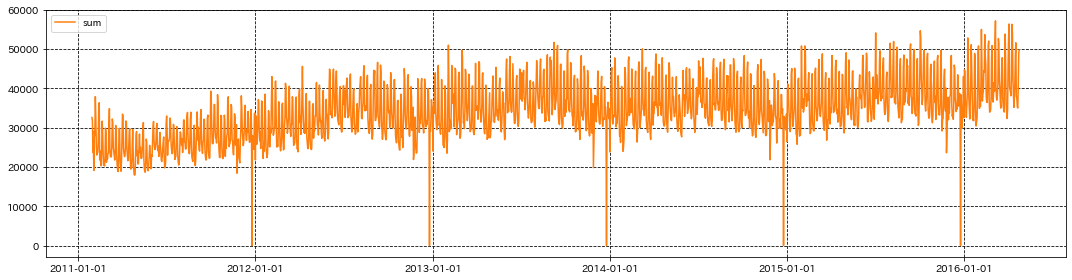

In [27]:

fg = Fig(figsize=(15,4))


ax = fg.fig.add_subplot(1, 1, 1)
ax = Ax(fig=fg,ax=ax)
df_filtered = copy.copy(df_validation)
df_filtered = df_filtered[ls_col_d].sum()

df_filtered = pd.DataFrame(df_filtered)
df_filtered = df_filtered.reset_index()
df_filtered = df_filtered.replace({'index':dct_d_to_date})
df_filtered = df_filtered.set_index('index')

#     df_filtered = df_filtered.resample(rule = 'M').sum()

ax.plot_line(
    df_filtered.index,
    df_filtered[0],
    'sum',
    color=ax.tab10(1),
    markersize=1
)

ax.xticklabelsDateFormatter('%Y-%m-%d')

ax.grid('x',True,color='black',linestyle='--')
ax.grid('y',True,color='black',linestyle='--')
ax.legend(loc='best')

In [28]:
def get_ema(_x, _period):
    ema = np.zeros(len(_x))
    ema[:] = np.nan # NaN で一旦初期化
    ema[_period-1] = _x[:_period].mean() # 最初だけ単純移動平均で算出
    
    for _day in range(_period, len(_x)):
        ema[_day] = ema[_day-1] + (_x[_day] - ema[_day-1]) * (2/ (_period + 1))
    
    return ema

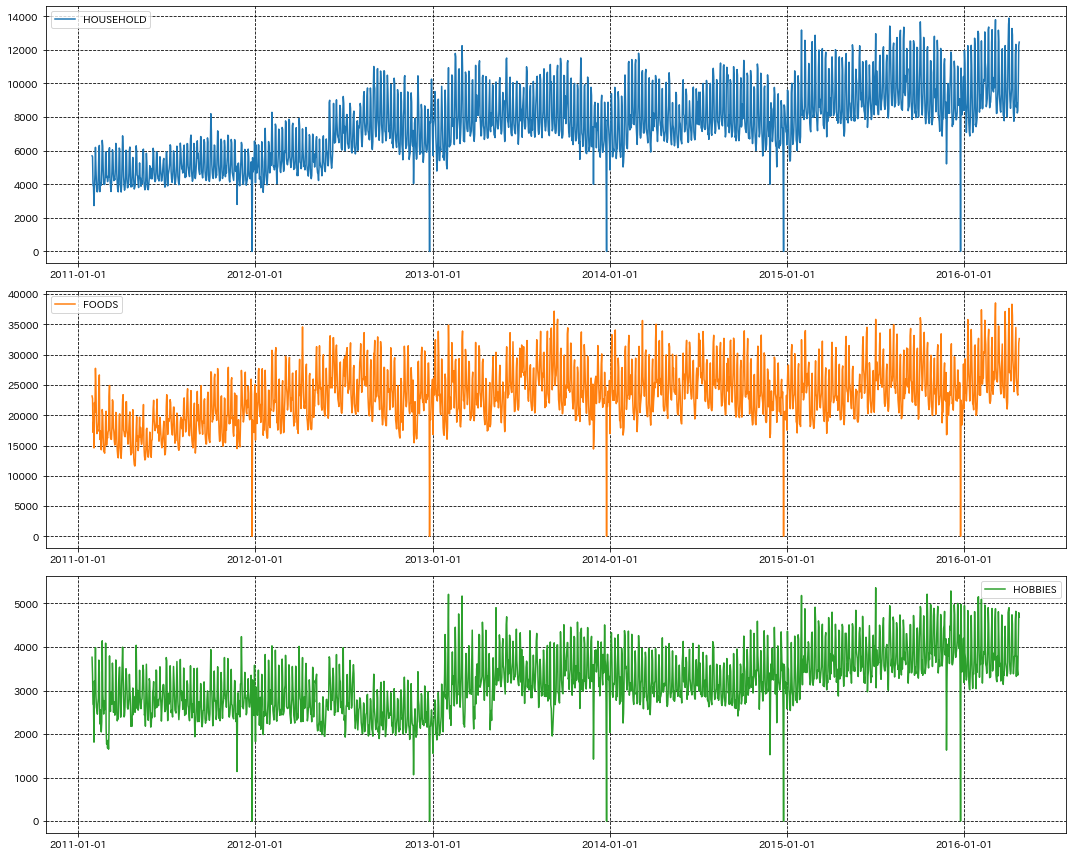

In [29]:

fg = Fig(figsize=(15,12))

for _cat in ls_cat:
    ax = fg.fig.add_subplot(3, 1, ls_cat.index(_cat)+1)
    ax = Ax(fig=fg,ax=ax)
    df_filtered = df_validation[df_validation.cat_id == _cat]
    df_filtered = df_filtered[ls_col_d].sum()
    
    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_date})
    df_filtered = df_filtered.set_index('index')
    
#     df_filtered = df_filtered.resample(rule = 'M').sum()

    ax.plot_line(
        df_filtered.index,
        df_filtered[0],
        _cat,
        color=ax.tab10(ls_cat.index(_cat))
    )
    
    ax.xticklabelsDateFormatter('%Y-%m-%d')
    
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(loc='best')


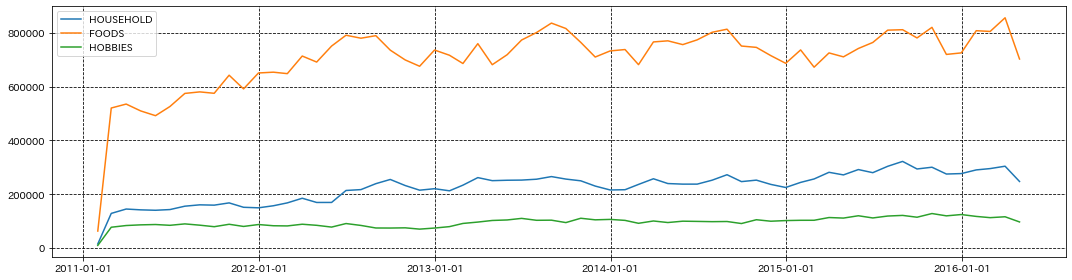

In [30]:


fg = Fig(figsize=(15,4))
ax = Ax(fig=fg,ax=fg.fig.add_subplot(1, 1, 1))
for _cat in ls_cat:

    df_filtered = df_validation[df_validation.cat_id == _cat]
    df_filtered = df_filtered[ls_col_d].sum()
    
    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_date})
    df_filtered = df_filtered.set_index('index')
    
    df_filtered = df_filtered.resample(rule = 'M').sum()

    ax.plot_line(
        df_filtered.index,
        df_filtered[0],
        _cat,color=ax.tab10(ls_cat.index(_cat))
    )
    
    ax.xticklabelsDateFormatter('%Y-%m-%d')
    
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')

    ax.legend(loc='best')


NameError: name 'datetime' is not defined

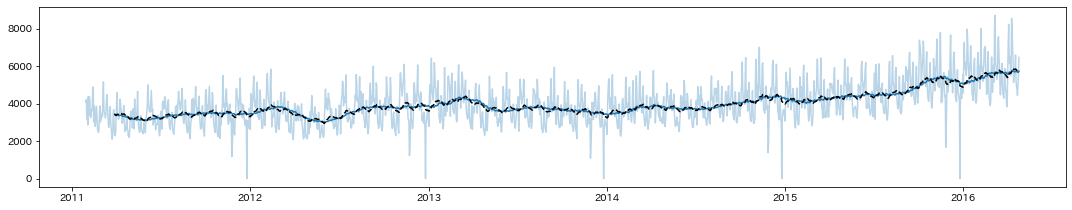

In [31]:
fg = Fig(figsize=(15,20))

for _dept in ls_dept:
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(len(ls_dept), 1, ls_dept.index(_dept)+1))
    
    
    df_filtered = df_validation[df_validation.dept_id == _dept]
    df_filtered = df_filtered[ls_col_d].sum()
    
    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_date})
    df_filtered = df_filtered.set_index('index')
    
#     df_filtered = df_filtered.resample(rule = 'M').sum()

    ax.plot_line(
        df_filtered.index,
        df_filtered[0],
        _dept,
        color=ax.tab10(ls_dept.index(_dept)),
        alpha=0.3
    )
    
    ax.plot_line(
        df_filtered.index,
        df_filtered[0].rolling(60).mean(),
        "RMA:"+_dept,
        color=ax.tab10(ls_dept.index(_dept))
    )
    
    ax.plot_line(
        df_filtered.index,
        get_ema(df_filtered[0],60),
        "EMA:"+_dept,
        color='black',
        linestyle='--'
    )
    
    ax.set_xlimDt(
        datetime.datetime(2015,1,1),
        datetime.datetime(2016,1,1)
    )
    
    ax.xticklabelsDateFormatter('%Y-%m-%d')
    
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')

    ax.legend(loc='best')


In [ ]:
fg = Fig(figsize=(15,8))
ax = Ax(fig=fg,ax=fg.fig.add_subplot(1, 1, 1))
for _dept in ls_dept:
    

    df_filtered = df_validation[df_validation.dept_id == _dept]
    df_filtered = df_filtered[ls_col_d].sum()

    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_date})
    df_filtered = df_filtered.set_index('index')

    df_filtered = df_filtered.resample(rule = 'M').sum()

    ax.plot_line(
        df_filtered.index,
        df_filtered[0],
        _dept,color=ax.tab10(ls_dept.index(_dept))
    )

    ax.xticklabelsDateFormatter('%Y-%m-%d')

    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')

ax.legend(loc='best')
    


In [ ]:
fg = Fig(figsize=(15,8))
for _state in ls_state:

    ax = Ax(fig=fg,ax=fg.fig.add_subplot(len(ls_state), 1, ls_state.index(_state)+1))
    
    
    df_filtered = df_validation[df_validation.state_id == _state]
    df_filtered = df_filtered[ls_col_d].sum()
    
    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_date})
    df_filtered = df_filtered.set_index('index')
    
#     df_filtered = df_filtered.resample(rule = 'M').sum()

    ax.plot_line(
        df_filtered.index,
        df_filtered[0],
        _state,color=ax.tab10(ls_state.index(_state))
    )
    
    ax.xticklabelsDateFormatter('%Y-%m-%d')
    
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')

    ax.legend(loc='best')


In [ ]:

fg = Fig(figsize=(15,4))
ax = Ax(fig=fg,ax=fg.fig.add_subplot(1, 1, 1))

for _state in ls_state:
    df_filtered = df_validation[df_validation.state_id == _state]
    df_filtered = df_filtered[ls_col_d].sum()

    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_date})
    df_filtered = df_filtered.set_index('index')

    df_filtered = df_filtered.resample(rule = 'M').sum()

    ax.plot_line(
        df_filtered.index,
        df_filtered[0],
        _state,color=ax.tab10(ls_state.index(_state))
    )

    ax.xticklabelsDateFormatter('%Y-%m-%d')

    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')

ax.legend(loc='best')


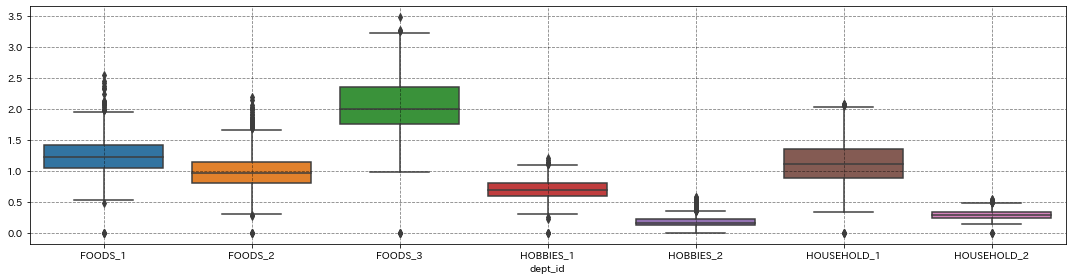

In [32]:

fg = Fig(figsize=(15,4))
ax = Ax(fig=fg,ax=fg.fig.add_subplot(1, 1, 1))


data = df_validation.groupby('dept_id').mean().T
ax.plot_box(data,has_mean=True)

ax.grid('x',True,color='black',linestyle='--',alpha=0.5)
ax.grid('y',True,color='black',linestyle='--',alpha=0.5)    


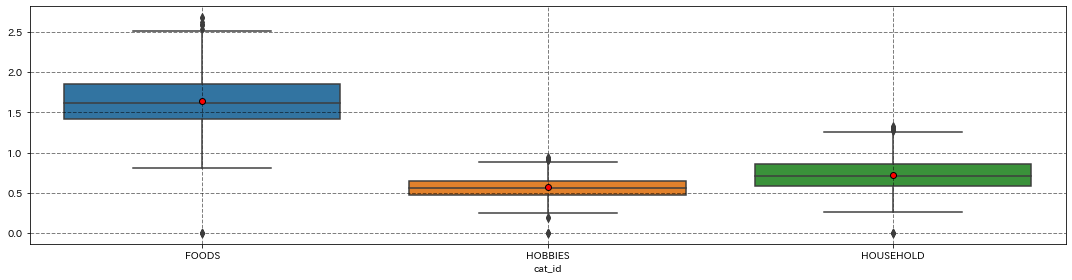

In [411]:

fg = Fig(figsize=(15,4))
ax = Ax(fig=fg,ax=fg.fig.add_subplot(1, 1, 1))

data = df_validation.groupby('cat_id').mean().T
ax.plot_box(data)

ax.grid('x',True,color='black',linestyle='--',alpha=0.5)
ax.grid('y',True,color='black',linestyle='--',alpha=0.5)    

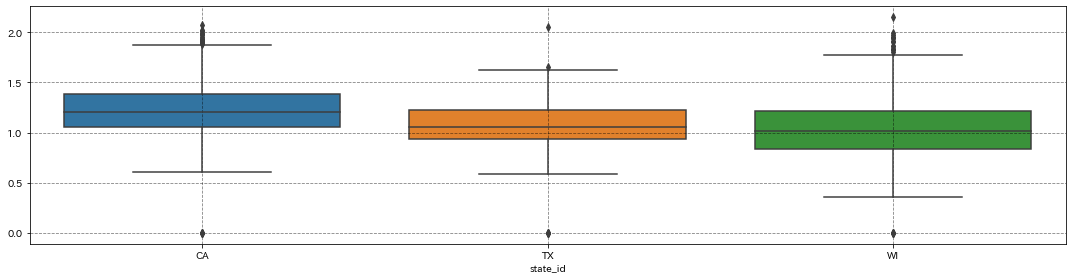

In [33]:

fg = Fig(figsize=(15,4))
ax = Ax(fig=fg,ax=fg.fig.add_subplot(1, 1, 1))

data = df_validation.groupby('state_id').mean().T
ax.plot_box(data)

ax.grid('x',True,color='black',linestyle='--',alpha=0.5)
ax.grid('y',True,color='black',linestyle='--',alpha=0.5)    

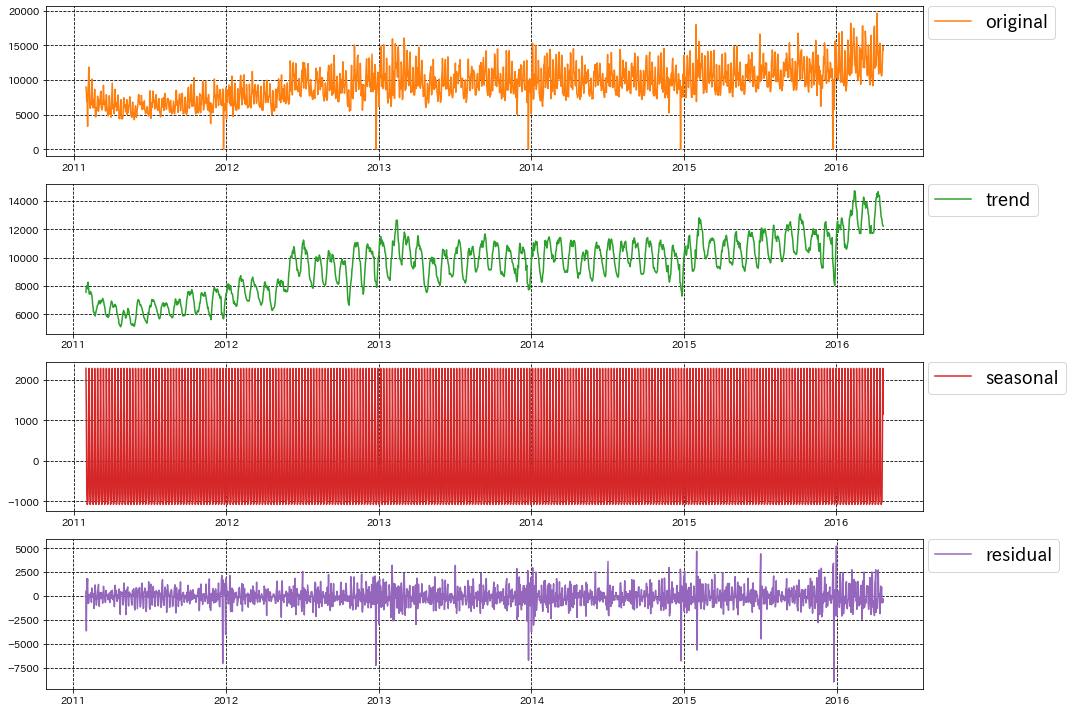

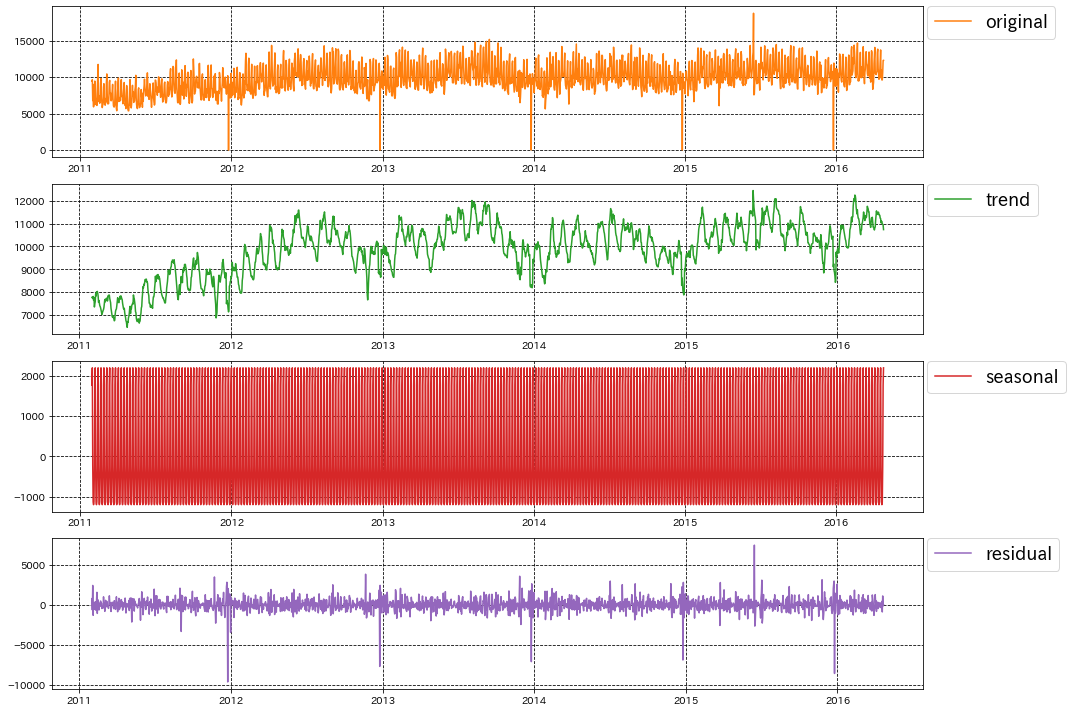

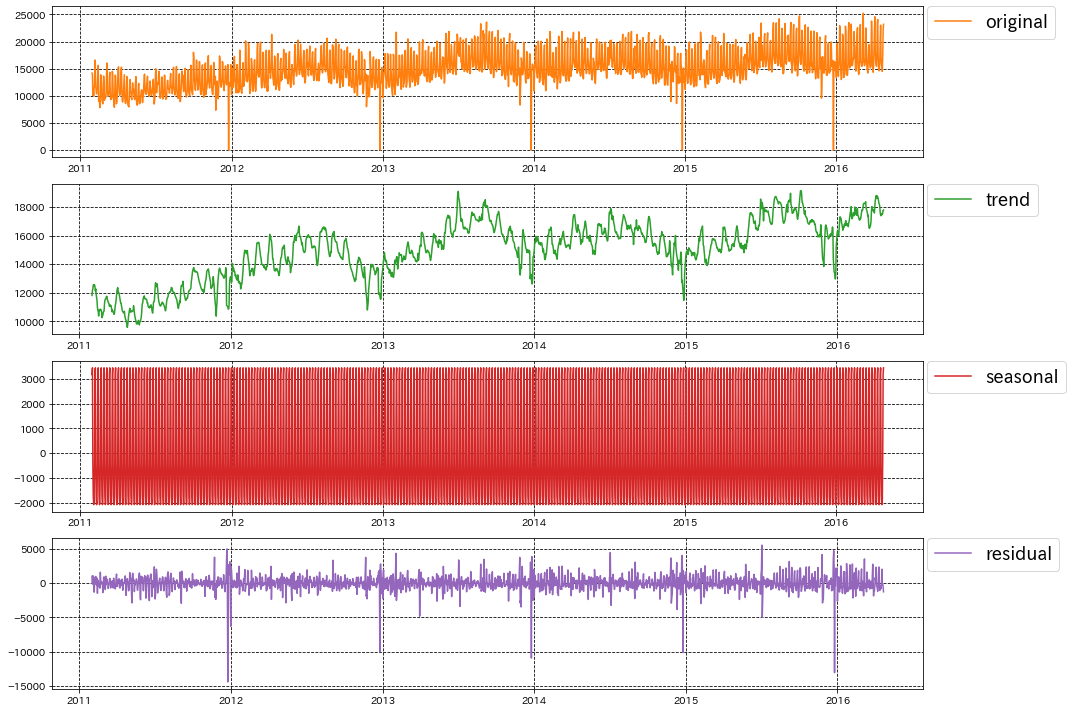

In [43]:

for _state in ls_state:
    fg = Fig(figsize=(15,10))

    df_filtered = df_validation[df_validation.state_id == _state]
    df_filtered = df_filtered[ls_col_d].sum()
    
    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_date})
    df_filtered = df_filtered.set_index('index')
    
    ts = sm.tsa.seasonal_decompose(df_filtered.values, period=7)
#     ts.plot()
#     print(ts.trend[10])

#     plt.plot(ts.trend) # トレンド成分
#     plt.plot(ts.seasonal) # 季節成分
#     plt.plot(ts.resid) # ノイズ成分
    
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 1))
    ax.plot_line(
        df_filtered.index,
        df_filtered.values,
        'original',color=ax.tab10(1)
    )
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=18)
    
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 2))
    ax.plot_line(
        df_filtered.index,
        ts.trend,
        'trend',color=ax.tab10(2)
    )
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=18)
    
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 3))
    ax.plot_line(
        df_filtered.index,
        ts.seasonal,
        'seasonal',color=ax.tab10(3)
    )
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=18)
    
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 4))
    ax.plot_line(
        df_filtered.index,
        ts.resid,
        'residual',color=ax.tab10(4)
    )
    
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=18)


In [35]:
def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def denoise_signal(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * maddest(coeff[-level])

    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hare') for i in coeff[1:])

    return pywt.waverec(coeff, wavelet, mode='per')

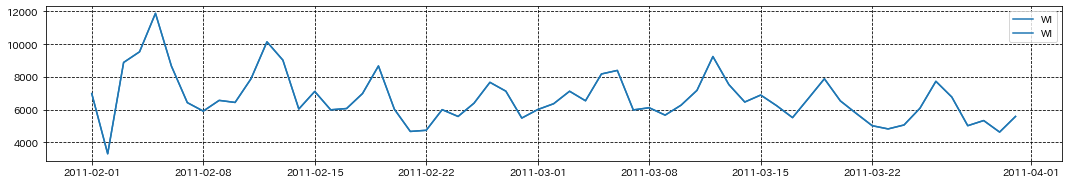

In [40]:
fg = Fig(figsize=(15,10))
ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 1))

for _state in ls_state:

    df_filtered = df_validation[df_validation.state_id == _state] 
    df_filtered = df_filtered[ls_col_d].sum()
    
    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_date})
    df_filtered = df_filtered.set_index('index')

#     df_filtered = df_filtered.resample(rule = 'M').sum()
    df_filtered = df_filtered["2011-02":"2011-3"]
    
    y = denoise_signal(df_filtered.values)

    ax.plot_line(
        df_filtered.index,
        y,
        _state,color=ax.tab10(ls_state.index(_state))
    )
    
    ax.plot_line(
        df_filtered.index,
        df_filtered.values,
        _state,color=ax.tab10(ls_state.index(_state))
    )

    ax.xticklabelsDateFormatter('%Y-%m-%d')

    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    break

ax.legend(loc='best')

In [106]:
ls_sale = y
# 自己相関
ls_sale_acf = sm.tsa.stattools.acf(ls_sale, nlags=40)

# 偏自己相関
ls_sale_pacf = sm.tsa.stattools.pacf(ls_sale, nlags=40, method='ols')


/Users/macico/.pyenv/versions/3.8.1/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
